In [5]:
# Importing pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

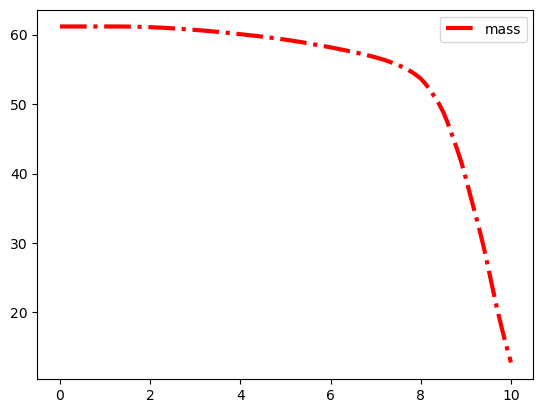

In [7]:
# read_csv returns a DataFrame, which is two-dimensional data structure with labeled axes.

data = pd.read_csv("data_1.dat", sep = "\s+")
#print(data) # Uncomment to print data

# To get the data from specific columns, you can use their respective keys, e.g.:

time = data["Time"]
mass = data["Mass1"]
flxh = data["FluxH"]
flxe = data["FluxE"]

# Checking how time looks
#print(time)

# What is the data type? Turns out pandas has its own called core.series.
#print(type(time))

# And now we plot
fig, ax = plt.subplots()

ax.plot(time,mass,color='red', linestyle="-.", linewidth=3, label="mass") # Matplotlib understands the pandas format!
ax.legend()
plt.show()

# Note that it is interesting that the mass drops dramatically at the end
# The reason for this drop is that most of the cloud material leaves the domain after t~8

In [11]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(time,flxe,color='green', linestyle="-.", linewidth=3, label="flxe") # Matplotlib understands the pandas format!
ax.plot(time,flxh,color='magenta', linestyle="-.", linewidth=3, label="flxh") # Matplotlib understands the pandas format!

ax.legend()
#plt.show()

plt.savefig("name.png")

### Statistics

In [12]:
# TIme average of the cloud mass
mean_mass = np.mean(mass)

stdv_mass = np.std(mass)

print("The time average of the cloud mass is: ", mean_mass)
print("The standard deviation of the cloud mass is: ", stdv_mass)

The time average of the cloud mass is:  54.736319306930696
The standard deviation of the cloud mass is:  11.071461699772582


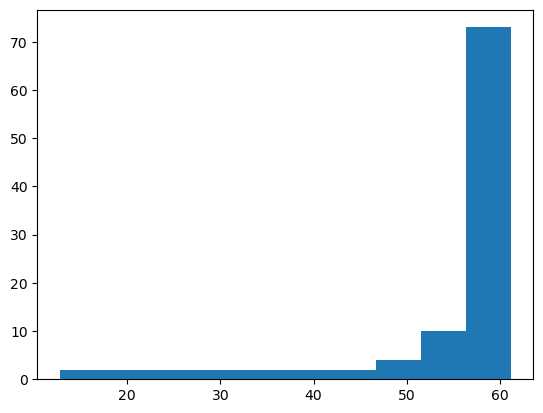

In [15]:
plt.hist(mass)
plt.show()

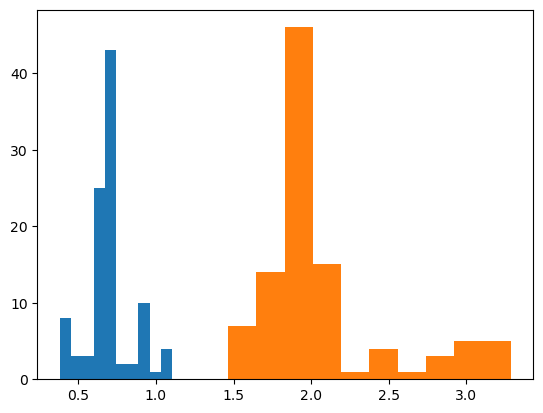

In [18]:
plt.hist(np.log10(flxe))
plt.hist(np.log(flxh))
plt.show()

### Derivatives

In [23]:
# USing np.diff

time_diff = np.diff(time) #Denominator

mass_diff = np.diff(mass) #NUmerator

#print(time_diff)
#print(mass_diff)


print(np.size(time))
print(np.size(time_diff))
print(np.size(mass_diff))


deriv = mass_diff / time_diff

time2 = (time[:-1] + time[1:])/2

print(time2)

101
100
100
0           NaN
1      0.099800
2      0.199956
3      0.299681
4      0.399916
         ...   
96     9.599985
97     9.699971
98     9.799818
99     9.899956
100         NaN
Name: Time, Length: 101, dtype: float64


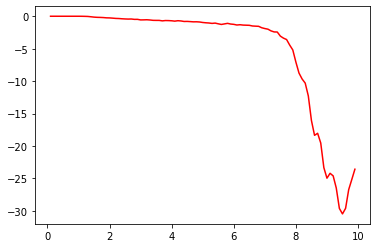

In [25]:
# Plotting
%matplotlib inline

plt.plot(time2[:-1], deriv, 'red')

### Second-order method:

Using np.gradient.

In [28]:
deriv2 = np.gradient(mass, (time[2]-time[1]))

print(np.size(deriv2))

101


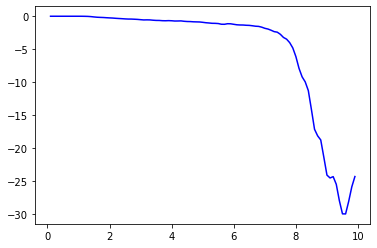

In [29]:
plt.plot(time2, deriv2, "blue")